# 지하철 이용객 분석
- https://data.busan.go.kr/
- 승하차 인원정보 검색
- 일별역별시간대별승하차 파일 받기
- 최신 csv 파일로 받기

In [28]:
import pandas as pd
file_path = "./ref/일별역별시간대별승하차인원(2025년 1월).csv"
data = pd.read_csv(file_path, encoding = 'EUC-KR')
data.head() # 맨 앞 데이터 5개 가져오기
#data.tail() # 맨 뒤 데이터 5개 가져오기

,역번호,역명,년월일,요일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2025-01-01,수,승차,8126,0,1,0,14,...,527,498,517,266,170,98,79,38,10,0
1,95,다대포해수욕장,2025-01-01,수,하차,7674,0,1,0,0,...,376,357,295,185,132,81,74,50,71,46
2,95,다대포해수욕장,2025-01-02,목,승차,4893,1,0,0,21,...,472,364,373,210,159,87,90,57,13,0
3,95,다대포해수욕장,2025-01-02,목,하차,3965,1,4,0,1,...,311,339,296,321,239,143,99,92,82,49
4,95,다대포해수욕장,2025-01-03,금,승차,4572,0,0,0,27,...,401,300,363,237,139,102,70,69,13,0


In [29]:
columns = ['num', 'name', 'date', 'week', 'type', 'total']
time_col = [f'{i}~{i + 1}H' for i in range(1, 24)]
columns = columns + time_col + ['24~01H']
data.columns = columns
data = data.loc[:,:'total']

In [30]:
data.head()

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수,승차,8126
1,95,다대포해수욕장,2025-01-01,수,하차,7674
2,95,다대포해수욕장,2025-01-02,목,승차,4893
3,95,다대포해수욕장,2025-01-02,목,하차,3965
4,95,다대포해수욕장,2025-01-03,금,승차,4572


In [31]:
data.tail()

,num,name,date,week,type,total
6939,414,안평,2025-01-29,수,하차,799
6940,414,안평,2025-01-30,목,승차,1041
6941,414,안평,2025-01-30,목,하차,996
6942,414,안평,2025-01-31,금,승차,1898
6943,414,안평,2025-01-31,금,하차,1773


In [32]:
df = data.groupby(['num', 'name', 'date', 'week']).sum().reset_index()
# df[df['date'] == '2025-01-01']
df

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수,승차하차,15800
1,95,다대포해수욕장,2025-01-02,목,승차하차,8858
2,95,다대포해수욕장,2025-01-03,금,승차하차,8279
3,95,다대포해수욕장,2025-01-04,토,승차하차,8477
4,95,다대포해수욕장,2025-01-05,일,승차하차,6912
...,...,...,...,...,...,...
3467,414,안평,2025-01-27,월,승차하차,2716
3468,414,안평,2025-01-28,화,승차하차,1987
3469,414,안평,2025-01-29,수,승차하차,1633
3470,414,안평,2025-01-30,목,승차하차,2037


In [33]:
gdata = df[['name', 'date', 'total']]
gdata = gdata.sort_values(by = ['name', 'date'], ascending = [True, False])
gdata.head(10)

,name,date,total
1890,가야,2025-01-31,6806
1889,가야,2025-01-30,3527
1888,가야,2025-01-29,3112
1887,가야,2025-01-28,3893
1886,가야,2025-01-27,5303
1885,가야,2025-01-26,4635
1884,가야,2025-01-25,6146
1883,가야,2025-01-24,8339
1882,가야,2025-01-23,7767
1881,가야,2025-01-22,7643


In [34]:
mdata = gdata.groupby(['name']).sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,가야,194925
1,감전,211937
2,강서구청,140162
3,개금,442819
4,거제,313595
...,...,...
103,토성,436698
104,하단,1003733
105,해운대,803371
106,호포,67287


In [35]:
sdata = mdata.sort_values(by = 'total', ascending = False)
sdata.head(10)
total_data = sdata[:20]
total_data

,name,date,total
70,서면,2025-01-312025-01-312025-01-302025-01-302025-0...,3626209
83,연산,2025-01-312025-01-312025-01-302025-01-302025-0...,1500575
61,부산역,2025-01-312025-01-302025-01-292025-01-282025-0...,1337149
65,사상,2025-01-312025-01-302025-01-292025-01-282025-0...,1230792
36,동래,2025-01-312025-01-312025-01-302025-01-302025-0...,1089751
72,센텀시티,2025-01-312025-01-302025-01-292025-01-282025-0...,1083780
88,자갈치,2025-01-312025-01-302025-01-292025-01-282025-0...,1070458
23,남포,2025-01-312025-01-302025-01-292025-01-282025-0...,1045512
64,부전,2025-01-312025-01-302025-01-292025-01-282025-0...,1008329
104,하단,2025-01-312025-01-302025-01-292025-01-282025-0...,1003733


In [42]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = './ref/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

In [11]:
#print(plt.rcParams["font.family"])
#for font in fm.findSystemFonts():
#    print(font)

In [39]:
!pip install squarify

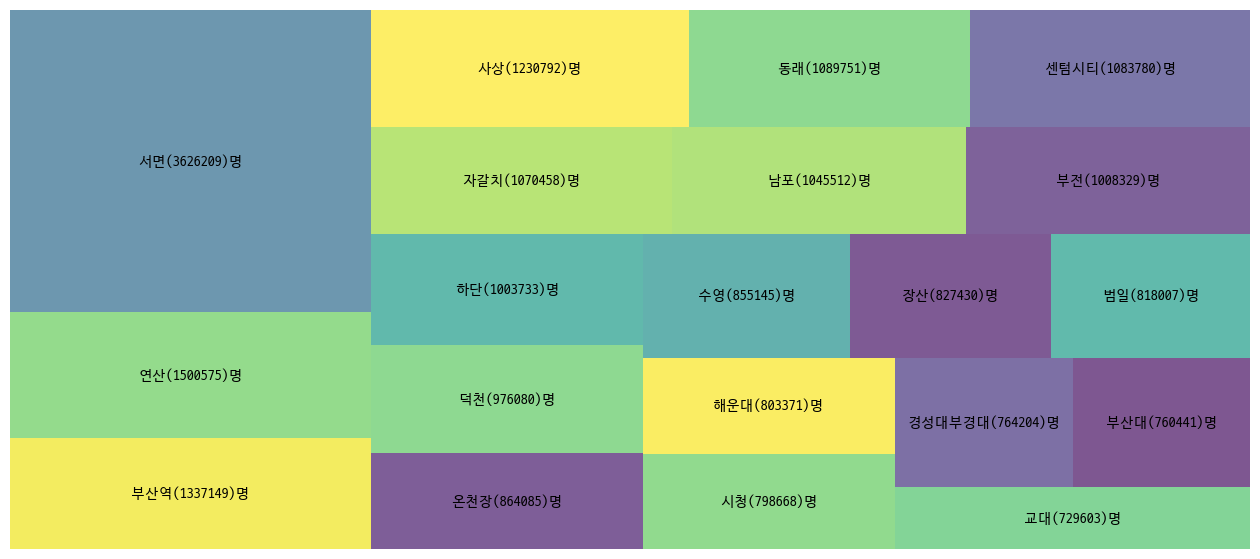

In [43]:
import squarify
plt.figure(figsize=(16,7))
squarify.plot(sizes = total_data['total'], label = [f"{x[0]}({x[1]})명" for x in zip(total_data['name'], total_data['total'])], alpha = 0.7)
plt.rcParams['font.size'] = 10
# plt.rcParams['text.color'] = 'blue'
plt.gca().invert_yaxis() # 축 뒤집기
plt.axis("off") # 축 인덱스 없애기
plt.show()